[Matplotlib Docs](https://matplotlib.org/stable/api/matplotlib_configuration_api.html)  -----  [Plotly Docs](https://plotly.com/python/plotly-fundamentals/)

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## Dashboard

### Plotly HTML

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot #'plot' for when is not in a Jupyter

import numpy as np

In [ ]:
# Create graphic

colorscale = [[0, '#FAEE1C'], [0.33, '#F3558E'], [0.66, '#9C1DE7'], [1, '#581B98']]
data = [go.Scatter(
  y = np.random.randn(500),
  mode='markers',
  marker=dict(
    size=16,
    color = np.random.randn(500),
    colorscale=colorscale,
    showscale=True
  )
)]
url_1 = iplot(data, filename='scatter-for-dashboard', auto_open=False)

In [ ]:
# Create html with the graphic

with open('scatter-for-dashboard.html', 'r') as f:
  load_plot = f.read()

html_string = '''
<!doctype html>
<html>
    <head>
        <meta charset="UTF-8">
        <title>GCalender Dashboard</title>
        <style>body{ margin:0 100; background:whitesmoke; }</style>
    </head>
    <body>
        <h1>Plots and more plots...</h1>
        <h2>Plot Scatter</h2>
        ''' + load_plot + '''
        <p>graph description...</p>
    </body>
</html>'''

with open('output.html', 'w', encoding = 'utf8') as f:
  f.write(html_string)


### Plotly Dash

In [ ]:
# Can see more in: jupyter libsPython.Web.Dash

from dash import Dash, html, dcc
import plotly.express as px

fig_var = px.line() # the plot definition
app = Dash(__name__) # the app definition

app.layout = html.Div([
    # List all components of app here
    html.H1('Some title'),
    html.Div(
        dcc.Graph(id='fig_id', figure=fig_var),
        )
])

if __name__ == '__main__':
    app.run(debug=True)

## General Funcs

### Matplotlib

In [ ]:
# to draw a figure object
fig = plt.figure(figsize=[6.4,4.8], #(float,float): width and height in inches
                 facecolor='white', #color: the background color
                 dpi=100.0,         #float: resolution of the figure in dots-per-inch
                 edgecolor='white', #color: the border color
                 clear=False        #bool: if True and the figure already exists, then it is cleaned
                 )
ax1 = fig.add_subplot(2, 2, 1) #(numb of rows, numb of cols, plot position) - to plot: `ax1.plot()`

# to draw multiple plots in a figure
fig, ax = plt.subplot(nrows=2, ncols=2, #int - numb of rows/cols
                      plot_index=3      #int - to select a position in the figure; or use `ax[irow,icol]`
                      )#in here, `ax` has this format: ((ax1, ax2), (ax3, ax4)) -> ax1 = ax[0,0]
fig, (ax1, ax2) = plt.subplots(1, 2) # other way to receive the axes - depend of how many subplots is been build

In [ ]:
# to use after plot a graphic - add grids inside the plot
plt.grid(axis='both',   #{'both', 'x', 'y'}: decide where to draw
         color='black', linestyle='-', linewidth=0.1)

# to add a title
plt.title('Title!')    #in the plot
plt.subtitle('Title!') #in the figure

# to add labels
plt.xlabel("I am x")
plt.ylabel("I am y")

# to show the plot - at the end
plt.show()

# multiple graphics in one plot
plt.plot()
plt.plot()
plt.show()

In [ ]:
# to clear the axes
ax.clear()

# add text to the Axes
ax.text(x, y, #float: axes position
        s=''  #str: the text
        )

# to use after plot a graphic - add grids inside the plot
ax.grid(axis='both',   #{'both', 'x', 'y'}: decide where to draw
        color='black', linestyle='-', linewidth=0.1)

# plot vertical lines at each x from ymin to ymax
ax.vlines(x,          #float or array-like: x-indexes where to plot
          ymin, ymax, #float or array-like: respective beginning and end of each line
          linestyles  #optional - {'solid', 'dashed', 'dashdot', 'dotted'}
          )

# plot horizontal lines at each x from ymin to ymax
ax.vlines(y,          #float or array-like: y-indexes where to plot
          xmin, xmax, #float or array-like: respective beginning and end of each line
          linestyles  #optional - {'solid', 'dashed', 'dashdot', 'dotted'}
          )

# add a horizontal span (rectangle) across the Axes
ax.axhspan(ymin, ymax,    #float: lower/upper y-coordinate of the span, in data units
           xmin=0, xmax=1 #float: lower/upper x-coordinate of the span, in x-axis (0-1) units
           )
ax.axvspan(xmin, xmax,    #float: lower/upper x-coordinate of the span, in data units
           ymin=0, ymax=1 #float: lower/upper y-coordinate of the span, in y-axis (0-1) units
           )

# set face color - has a `get_facecolor()
ax.set_facecolor(color)

# return the x/y axis instance
ax.xaxis # or `ax.yaxis`

# invert the x/y axis
ax.invert_xaxis() #or `ax.invert_xaxis()`

# set the x/y axis view limits - has a `get_x/ylim()`
ax.set_xlim(left=None, #float: the left xlim in data coordinates
            right,     #optional - float: the right xlim in data coordinates
            )# or `set_ylim()`

In [ ]:
# Set the label for the x-axis - there is a `ax.get_x/ylabel()`
ax.set_xlabel("I am x") #or `ax.set_ylabel()` to y-axis

# Set a title for the axis - there is a `ax.get_title()`
ax.set_title('Title!')

# Place a legend on the axes - there is a `ax.get_legend()` or `ax.get_legend_handles_labels()`
ax.legend(handles, #optional - sequence of Artists :: list of graphics objects to be added to the legend
          labels   #optional - list of str :: list of labels to show nest to the artists
          )

# Set the x/y-axis' scale - there is a `ax.get_x/yscale()`
ax.set_xscale(value #{"linear", "log", "symlog", "logit", ...} or ScaleBase :: the scale type to apply
              )#or `ax.set_yscale()` to y-axis

### Plotly

Docs related to update_layout, update_traces, update_x/yaces, and many others *update_*, [can be found here](https://plotly.com/python/reference/scatter/).

In [ ]:
# Subplots
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, # qty of rows n cols, qty of plots is rows*cols
                    subplot_titles=(evt+' daily', evt+' per day of week')) # each tuple element is a title subplot

fig.add_trace(
    go.Bar(x=data.loc[:,'day'], y=data.loc[:,"duration"]),
    row=1, col=1) # plot position

fig.add_trace(
    go.Bar(x=data.loc[:,'name_day'], y=data.loc[:,"duration"]),
    row=1, col=2) # plot position


In [ ]:
# Hover data
go.Bar(x=data.loc[:,'day'], y=data.loc[:,"duration"], # input data to plot
       customdata=data[hover_cols], # data to show up into the hover, hover_cols: list of cols names, don't include the axes cols
       hovertemplate='day/duration: %{x}---%{y}' + # how the data will be displayed in the hover
                'col_name: %{customdata[col_idx]}' # col_name is one of the names in hover_cols, col_idx is the index
       )              # when use hover_cols, can use the func get_hover_text() bellow to help to se the string

def get_hover_text(cols):
    hover_txt = ''
    for i,col_ in enumerate(cols):
        hover_txt += '<br>' + col_.replace('_',' ').capitalize() + ': %{customdata[' + str(i) + ']}'
    return hover_txt

In [ ]:
# Set the values order for x axes
fig.update_xaxes(categoryorder='array', categoryarray=values_list,
                 row=1, col=2 # in case of a subplots
                 )


In [ ]:

fig.update_layout(bargap=0.2)
fig.update_layout(legend_title_text = "title")
fig.update_layout(showlegend=True)


fig.update_traces(diagonal_visible=False)

## Histogram

X-Axes: *1+ quantitative variables* - it's value <---> Y-Axes: the distribution frequency of a variable

--------------------------------------------------------------------------------###--------------------------------------------------------------------------------

Represent the frequency distribution of variables in a data set, i.e., shows the frequency of numerical data using rectangules.

Condenses a data series into an easily interpreted visual by taking many data points and grouping them into logical ranges or bins.

Be careful with multi-column histograms, try to avoid them.

### Matplotlib

(array([[1.32856138e-03, 1.24401657e-02, 7.23462061e-02, 2.35276143e-01,
         3.72117965e-01, 3.29724779e-01, 1.46987200e-01, 3.30932562e-02,
         4.22724076e-03, 2.41556615e-04],
        [1.20778307e-03, 1.25609440e-02, 7.59695553e-02, 2.35517699e-01,
         3.76828319e-01, 3.18130062e-01, 1.49281988e-01, 3.29724779e-02,
         4.71035399e-03, 6.03891537e-04],
        [1.08700477e-03, 1.15947175e-02, 7.43994373e-02, 2.32377463e-01,
         3.75137423e-01, 3.30087114e-01, 1.44692412e-01, 3.39387044e-02,
         3.86490584e-03, 6.03891537e-04]]),
 array([-3.93812555, -3.1101623 , -2.28219905, -1.4542358 , -0.62627255,
         0.2016907 ,  1.02965395,  1.8576172 ,  2.68558045,  3.5135437 ,
         4.34150695]),
 <a list of 3 Lists of Patches objects>)

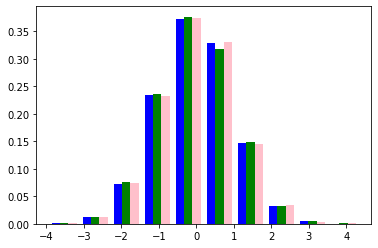

In [ ]:
n_bins = 20
x = np.random.randn(10000, 3) #array with 3 elements (also a arrays)
colors = ['blue','green','pink']

plt.hist(x, bins=10,             #int or seq: defines the numb of bins or the bin edges
         density = True,         #bool: if True, draw and return a prob density
         histtype ='bar',        #{'bar': tradicional way, 'barstacked': multiple data are stacked,
                                  #'step': generates a lineplot that is unfilled, 'stepfilled': generates a lineplot that is filled}
         orientation='vertical', #{'vertical', 'horizontal'}
         rwidth=None,            #float or None: the relative width of the bars as a fraction of the bin width, if None, automatically compute the width
         color=colors,           #str or array-like: colors to use (Default is None)
         stacked=False           #bool: if True, multiple data are stacked on top of each other
         )

### Plotly

In [ ]:
# getting data
df = px.data.tips()

In [ ]:
fig = px.histogram(df, x="total_bill",   #str :: the col name on x-axis
                   nbins=20,             #optional - int :: numb of bins
                   title='Hist Title',   #optional - str :: histogram title
                   opacity=0.8,          #optional - float :: level of opacity
                   color='sex',          #optional - str :: col name - split the data in multiple histogram by this col
                   text_auto=True,       #optional - bool :: add text to the bars - default False
                   hover_data=df.columns #optional - list str :: cols name of col that should appear in the hover
                                                # hover data its a box open when move the mouse over the any bar and show some info
                   )
fig.show()

In [ ]:
fig = px.histogram(df, x="day", #same, but w/ categorical data
                   category_orders=dict(day=["Thur", "Fri", "Sat", "Sun"]) #optional - dict :: bins order by label
                   )
fig.show()

## Box & Violin Plot

In [ ]:
# Matplotlib
data_1 = np.random.normal(100, 10, 200)
data_2 = np.random.normal(90, 20, 200)
data_3 = np.random.normal(80, 30, 200)
data_4 = np.random.normal(70, 40, 200)
data_bp = [data_1, data_2, data_3, data_4]

# Plotlly
df = px.data.tips()

### Box Plot

X-Axes: *1+ qualitative variables* - creates groups <---> Y-Axes: *1+ continuous variables* - is plotted

--------------------------------------------------------------------###--------------------------------------------------------------------

Tell us how the values in the data are spread out.

Is a method for graphically depicting groups of numerical data through their quartiles.

Good to compare distributions between many groups or datasets.


#### Matplotlib

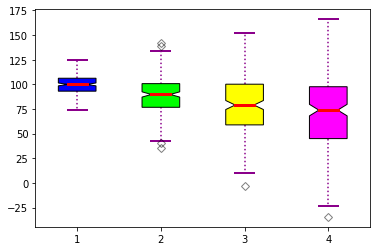

In [ ]:
bp = plt.boxplot(x=data_bp,          #array or seq of array
                 notch=True,         #bool: to draw a notched boxplot or a rectangular boxplot (default is False)
                 vert=True,          #bool: draw vertical or horizontal boxes
                 whis=1.5,           #float or (float, float): position of the whiskers
                 patch_artist=True,  #bool: if False produces boxes with the Line2D artist (default is False)
                 widths=0.5          #float or array-float: widths of the boxes
                 )

# change boxes colors - ´patch_artist=True´
colors = ['#0000FF', '#00FF00','#FFFF00', '#FF00FF']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# changing color and linewidth of whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B', linewidth = 1.5, linestyle =":")

# changing color and linewidth of caps - adj values
for cap in bp['caps']:
    cap.set(color ='#8B008B', linewidth = 2)

# changing color and linewidth of medians
for median in bp['medians']:
    median.set(color ='red', linewidth = 3)

# changing style of fliers - outliers
for flier in bp['fliers']:
    flier.set(marker ='D', color ='#e7298a', alpha = 0.5)

plt.show()

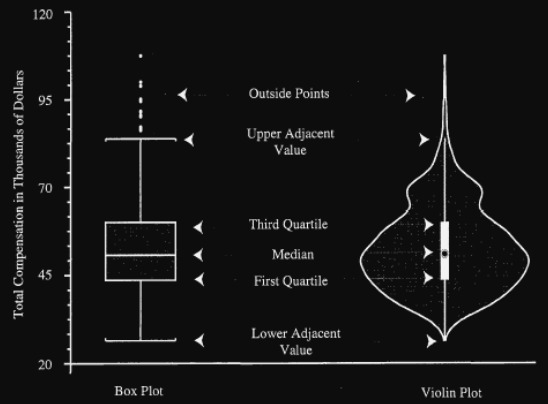

#### Plotly

In [ ]:
fig = px.box(df, x='time',      #optional - str :: a box plot, in axis x, for each value of this col
             y='total_bill',    #str :: main col name for the box - axis y
             points='all',      #optional - str :: display underlying data; {'all': all data points, 'outliers': default - only them, 'False': none}
             color='smoker',    #optional - str :: a box plot, define by the color, for each value of this col
             title='Box Title', #optional - str :: box plot title
             notched=True,      #optional - bool :: used notched shape, default False
             hover_data=["day"] #optional - list str :: add col name to hover data
             )

# which algorithm used to compute the quartiles
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default

fig.show()

### Violin Plot

Axes same as above *(Box Plot)*.

--------------------------------------------------------------------###--------------------------------------------------------------------

Shows the full distribution of the data.

Combination of box plot with a kernel density plot, so show the summary statistics *- Box Plot -* it also shows how numerical data is distributed, ie, it's density *- rotating Kernel Density Plot*.

#### Matplotlib

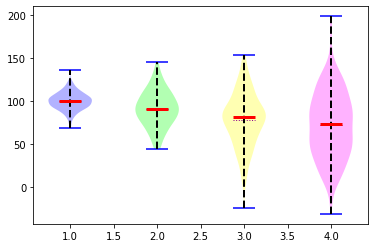

In [ ]:
vp = plt.violinplot(dataset=data_bp,       #array or seq of array
                   #positions=[1,2,...,n], #array-like: the positions of the violins
                    vert=True,             #bool: draw vertical or horizontal violin
                    showmeans=True,        #bool: if True, will togglle rendering of the means (Default is False)
                    showextrema=True,      #bool: if True, will togglle rendering of the extrema
                    showmedians=True,      #bool: if True, will togglle rendering of the medians (Default is False)
                    quantiles=None,        #array-like: a list of floats in [0,1] for each violin
                    points=100             #int: numb of point to evaluate each of the gaussian kernel
                    )

# change violin bodies colors
colors = ['#0000FF', '#00FF00','#FFFF00', '#FF00FF']
for patch, color in zip(vp['bodies'], colors):
    patch.set_facecolor(color)

# changing color and linewidth of means
vp['cmeans'].set(color ='#8B008B', linewidth = 1, linestyle =":")

# changing color and linewidth of the center of each violin
vp['cbars'].set(color ='black', linewidth = 2, linestyle ="--")

# changing color and linewidth of medians
vp['cmedians'].set(color ='red', linewidth = 3)

# changing color and linewidth of the bottom of each violin
vp['cmins'].set(color ='blue', linewidth = 1.5)

# changing color and linewidth of the top of each violin
vp['cmaxes'].set(color ='blue', linewidth = 1.5)

plt.show()

#### Plotly

In [ ]:
fig = px.violin(df, x='time',         #optional - str :: a box plot, in axis x, for each value of this col
                y='total_bill',       #str :: main col name for the box - axis y
                points='all',         #optional - str :: display underlying data; {'all': all data points, 'outliers': default - only them, 'False': none}
                color='smoker',       #optional - str :: a box plot, define by the color, for each value of this col
                title='Vio Title',    #optional - str :: box plot title
                box=True,             #optional - bool :: true to draw box plot inside the violin
                violinmode='overlay', #optional - str :: draw violins on top of each other - default violinmode is 'group' as normal ones
                hover_data=["day"]    #optional - list str :: add col name to hover data
                )

fig.show()

## Scatterplot & Bubble

In [ ]:
# Matplotlib
y1 = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
x1 = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
x2 = x1*20

#Plotly
df = px.data.iris()
col_dimen = ["sepal_width", "sepal_length", "petal_width", "petal_length"]

### Scatterplot

Analysis: *2-3 variables variables* <---> Axes: *2 quantitative variables* <---> Colors: *1 qualitative variable*

----------------------------------------------------------------------------------###----------------------------------------------------------------------------------

It consists of multiple data points plotted across two axes, each one of them will represent one quantitative variable.

Possible to add 1 qualitative variable, it'll be represented in the dots' color.

Good to see if there is a *pattern / relationship / correlation* to be found between two variables.

Be carefull with overploting.

#### Matplotlib

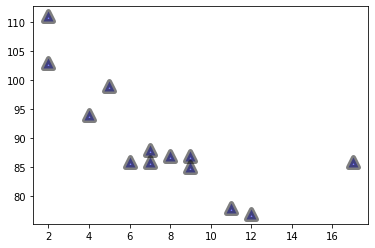

In [ ]:
plt.scatter(x1, y1,            #data in axis X and Y
            s=100,             #optional - marker size (can be scalar or array of size equal to size of x or y)
            c='blue',          #optional - color of sequence of colors for markers
            marker='^',        #optional - marker style
            linewidths=5,      #optional - width of marker border
            edgecolor='black', #optional - marker border color
            alpha=0.5          #optional - blending value, between 0 (transparent) and 1 (opaque)
)

#### Plotly

In [ ]:
df["e"] = df["sepal_width"]/100 #create the errors of 1%

fig = px.scatter(df, x="sepal_width", y="sepal_length", #dataframe -- col name for axis x -- col name for axis y
                 color="species", symbol="species",      #optional - str :: separeted by this col name using symbol color or symbol format
                 error_x="e", error_y="e"               #optional - str :: col names with the error; support Error Bars
                 )
fig.show()

In [ ]:
# a matrix of scatterplots
fig = px.scatter_matrix(df, dimensions=col_dimen,           #optional - list str :: col name for both axis, x and y
                        color="species", symbol="species",  #optional - str :: separeted by this col name using symbol color or symbol format
                        title="Scatter matrix title",       #optional - str :: matrix title
                        labels={col:col.replace('_', ' ') for col in df.columns} #optional - dict :: x and y labels
                        )

# eliminates plot in the main diag
fig.update_traces(diagonal_visible=False)

fig.show()

### Bubble Chart

Same as above *(Scatterplot)* + another *quantitative var*

--------------------------------------------------------------------###--------------------------------------------------------------------

It’s like a scatterplot, but have a fourth variable represented as the size of the dot (bubble).

#### Matplotlib

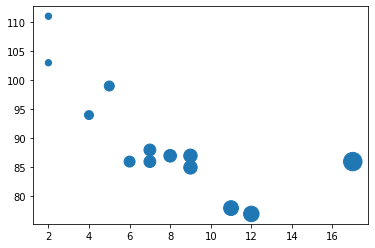

In [ ]:
plt.scatter(x1, y1, s=x2)

#### Plotly

In [ ]:
# just use the parameter `size` - same logic as color/symbol
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 size='petal_length', hover_data=['petal_width'])
fig.show()

## Bar Chart

In [ ]:
# Matplotlib
x = ['A', 'B', 'C', 'D']
y2 = np.array([10, 20, 10, 30])
y3 = np.array([20, 25, 15, 25])
y4 = np.array([12, 15, 19, 6])
y5 = np.array([10, 29, 13, 19])
df = pd.DataFrame([['A', 10, 20, 10, 26], ['B', 20, 25, 15, 21],
                   ['C', 12, 15, 19, 6], ['D', 10, 18, 11, 19]],
                  columns=['Team', 'Round 1', 'Round 2', 'Round 3', 'Round 4'])

# Plotly
df_oce = px.data.gapminder().query("continent == 'Oceania'")
df_can = px.data.gapminder().query("country == 'Canada'")
long_df = px.data.medals_long()
wide_df = px.data.medals_wide()

### Default

X-Axes: *1+ qualitative variables* <---> Y-Axes: *1+ quantitative variables*

--------------------------------------------------------------------###--------------------------------------------------------------------

Is composed of a series of bars illustrating a variable’s development.

The X-axes will be a qualitative variable, can be a *categorical* one or a *time-related* one.

Bad to analyze multiple variables.

#### Matplotlib

<BarContainer object of 4 artists>

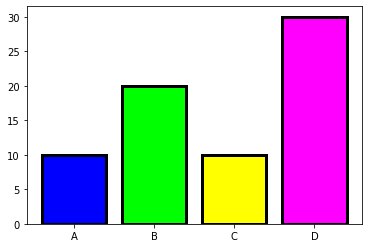

In [ ]:
colors = ['#0000FF', '#00FF00','#FFFF00', '#FF00FF']

plt.bar(x, y2, width=0.8,  #float or array-like - the bars' width
       #bottom,            #float or array-like: the y coordinates of the bottom sides
        align='center',    #{'center': center the base on the x pos, 'edge': align the left edfes of the bars}
        color=colors,      #optional - str or array-like: the color of the bar faces
        edgecolor='black', #optional - str or array-like: the color of the bar edges
        linewidth=3,       #optional - str or array-like: width of the bar edges
        log=False          #bool: if false, set the y-axis to be log scale
        )

#### Plotly

In [ ]:
# when use the param `color`, the plot can be stacked
#   if color has high capilarity, the plot will not be stacked;
#   if color has low capilarity, can avoid using barmode='group'
# when the datagrame has more them one quantitative var and any of them has capilarity > 1,
#   the plot will be automatically stacked, no matter what you do

In [ ]:
# color has high capilarity
fig = px.bar(df_can, x="year", y="pop",       #str :: col name for axis x and y
             color='lifeExp',                 #optional - str :: col name for axis x, y and colors for each value in color
             hover_data=['gdpPercap'],        #optional - list str :: cols name to add in hover data
             labels={'pop':'pop of Canada'},  #optional - dict :: key be the col name in any axis and value its new name
             #text_auto=True,                 #optional - bool :: show text in the box - Defautl False
             text='gdpPercap'                 #optional - bool :: show text based on a col name - text_auto must be False
             )

# Set text on the bar
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

fig.show()

In [ ]:
# data in long-form - has one row per observation, and one column per variable
# color has low capilarity

fig = px.bar(long_df, x="nation", y="count", color="medal", title="Long-Form Input", barmode='group')
fig.show()

In [ ]:
# data in wide-form - has one row per value of one of the first variable, and one column per value of the second variable
# color has low capilarity

fig = px.bar(wide_df, x="nation", y=["gold", "silver", "bronze"], barmode='group')
fig.show()

### Stacked Bar

Axes same as above *(Bar Chart)*, but the Y-axes will have *2+ quantitative var*

--------------------------------------------------------------------###--------------------------------------------------------------------

Is the same as above, but the bars will be stacked one over another.

To create a Floating Bars *- special case -* just put some of the bars with the same color as the background.

#### Matplotlib

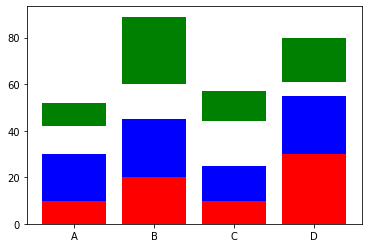

In [ ]:
## Using default
   # in vertical, put   'left'   instead of  bottom'
                # and 'plt.barh' instead of 'plt.bar'

plt.bar(x, y2, color='r')
plt.bar(x, y3, bottom=y2, color='b')
plt.bar(x, y4, bottom=y2+y3, color='w')
plt.bar(x, y5, bottom=y2+y3+y4, color='g')
plt.show()

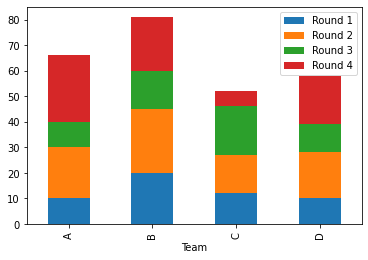

In [ ]:
## Using dataframe - if stacked=True, the bars will be stacked
 #                   if stacked=False, it'll be side by side

df.plot(x='Team', kind='bar', stacked=True)

#### Plotly

In [ ]:
# color has low capilarity
fig = px.bar(df_oce, x="year", y="pop",color='country')

fig.show()

## Line Chart

X-Axes: *1+ qualitative variables* - time measure <---> Y-Axes: *1+ quantitative variables*

--------------------------------------------------------------------###--------------------------------------------------------------------

Is one or more lines showing how one or more variables develop over time, which helps to compare changes between groups.

Good for analyzing multiple variables. Bad to show how the individual parts of a whole change over time. **Prefere**


**Variations**

Stacked Line Chart
> Axes same as above *(Line Chart)*, but the Y-axes will have *2+ quantitative var*. Is the same as above, but the lines will be accumulated one over another. **Better Avoid**



100% Stacked Line Chart
> Axes same as above *(Line Chart)*, but the Y-axes will have *2+ quantitative var*. Is the same as above, but the values are showing in percentage. **Better Avoid**

In [ ]:
# Matplotlib
x = np.array([19,44,96,130])
y = np.array([150, 200, 250, 300])
df = pd.DataFrame([['A', 10, 20, 10, 26], ['B', 20, 25, 15, 21], ['C', 12, 15, 19, 6],
                   ['D', 10, 18, 11, 19]],
                  columns=['Team', 'Round 1', 'Round 2', 'Round 3', 'Round 4'])

# Plotly
df_oce = px.data.gapminder().query("continent == 'Oceania'")

#### Matplotlib

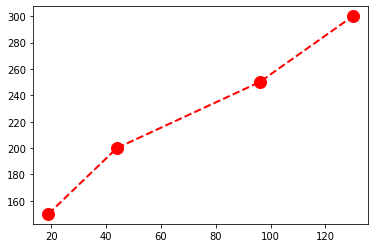

In [ ]:
plt.plot(x, y,             #array-like: data to plot
         color='red',        #str: line color
         marker='o',         #str: marker style
         linestyle='dashed', #str: line style
         linewidth=2,        #int: line size
         markersize=12       #int: marker size
         )

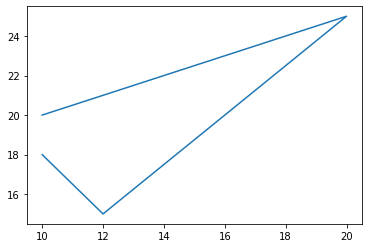

In [ ]:
# plot using dict/df columns labels
plt.plot('Round 1', 'Round 2', data=df)

#### Plotly

In [ ]:
fig = px.line(df_oce, x="year", y="lifeExp",
              color='country',    #optional - str :: create a line for each value in color using diff colors
              title='Line Title', #optional - str :: plot title
              text='year',        #optional - str :: add text and scatter points
              markers=True,       #optional - bool :: show data points markers
              symbol='country',   #optional - str :: create a line for each value in symbol using diff symbols
              )

fig.update_traces(textposition="bottom right")

fig.show()

In [ ]:
fig = px.line(df_oce, x="lifeExp", y="gdpPercap", color="country", text="year")
fig.update_traces(textposition="bottom right")
fig.show()

## Area Chart

In [ ]:
# Matplotlib
x = np.arange(0, 10, 1)
y = x + 5
y1 = y*np.random.random((5, x.size))
colors = ['blue','red','green','pink','black']
df = pd.DataFrame([['A', 10, 20, 10, 26], ['B', 20, 25, 15, 21], ['C', 12, 15, 19, 6],
                   ['D', 10, 18, 11, 19]],
                  columns=['Team', 'Round 1', 'Round 2', 'Round 3', 'Round 4'])

# Plotly
df2 = px.data.gapminder()
df3 = px.data.medals_long()

### Default - Avoid use

X-Axes: *1 qualitative variable* - time measure <---> Y-Axes: *1+ quantitative variables*

--------------------------------------------------------------------###--------------------------------------------------------------------

**--Avoid**

Is like a line chart, but coloured regions show us the development of each variable over time.

Good to show how the individual parts of a whole change over time.

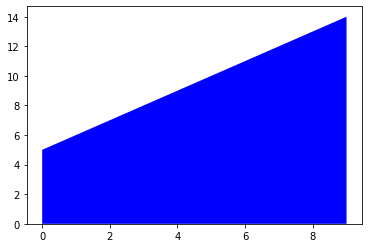

In [ ]:
plt.stackplot(x, y,
              baseline='zero', #{'zero': cts zero baseline, 'sym': symmetric around zero,
                                #'wiggle': minimize the sum of the squared sloped, 'weighted_wiggle': same use weights}
              colors=colors    #optional - list of colors: same size of the x
              ) #can use the same parameters as `plt.plot()`

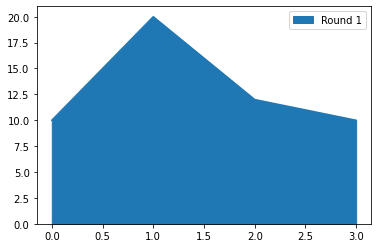

In [ ]:
# using df
df.plot.area(y='Round 1')

### Stacked Area Chart

Axes same as above *(Area Chart)*, but the Y-axes will have *2+ quantitative var*

--------------------------------------------------------------------###--------------------------------------------------------------------

Is the same as above, but the lines will be accumulated. **--Prefere**

#### Matplotlib

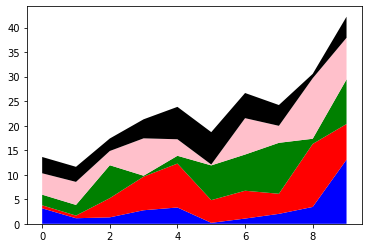

In [ ]:
plt.stackplot(x, y1,  baseline='zero', colors=colors)

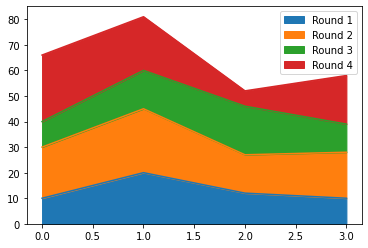

In [ ]:
# using df
df.plot.area()

#### Plotly

In [ ]:
fig = px.area(df3, x="medal", y="count", color="nation")
fig.show()

### 100% Stacked Area Chart

Axes same as above *(Area Chart)*, but the Y-axes will have *2+ quantitative var*

--------------------------------------------------------------------###--------------------------------------------------------------------

**--Prefere**

Is the same as above, but  the values are showing in percentage.

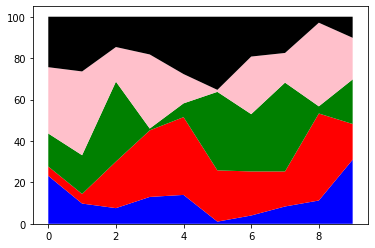

In [ ]:
y_perc = y1 / y1.sum(axis=0).astype(float) * 100
plt.stackplot(x, y_perc,  baseline='zero', colors=colors)

## Dual Axis Chart

X-Axes: *1 qualitative variable* <---> Y-Axes: *2 quantitative variables*

--------------------------------------------------------------------###--------------------------------------------------------------------

It’s a chart where there are two y-axes and one shared x-axes.

Good to see relationships, comparing trends.

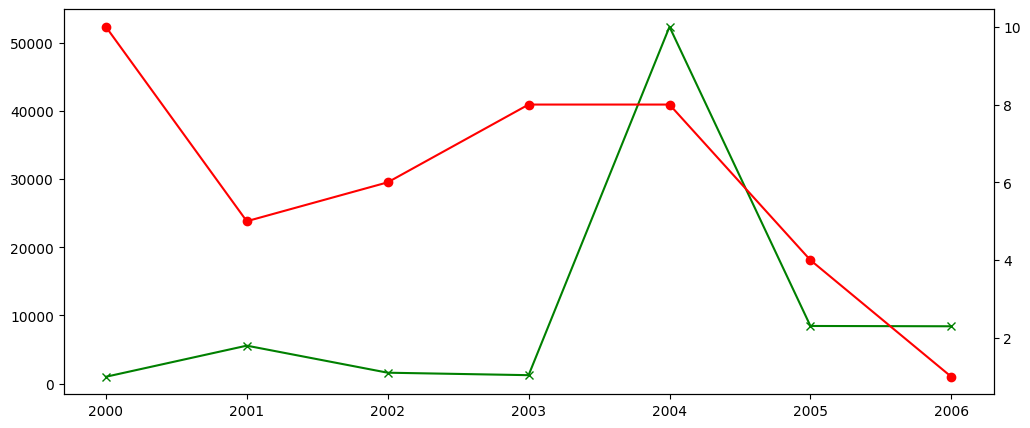

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx() #create the second/twin axis

date = np.array(['2000','2001','2002','2003','2004','2005','2006'])
gdp_per_capita = np.array([1000,5568,1598,1236,52369,8456,8412])
gdp_perc_growth = np.array([10,5,6,8,8,4,1])

# can be any type of plot
ax.plot(date, gdp_per_capita, color='green', marker='x')
ax2.plot(date, gdp_perc_growth, color='red', marker='o')

plt.show()

## Secondary Axes

X-Axes: *2 quantitative variable* <---> Y-Axes: *1 random variables*

--------------------------------------------------------------------###--------------------------------------------------------------------

It’s a chart where there are two x-axes and one shared y-axes.

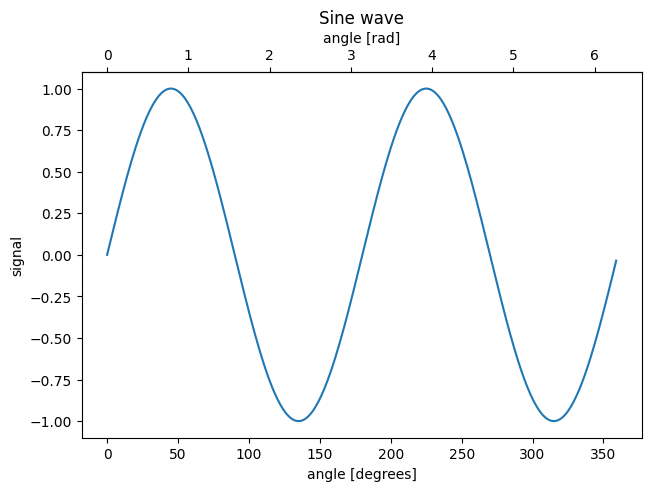

In [ ]:
x = np.arange(0, 360, 1)
y = np.sin(2 * x * np.pi / 180)

fig, ax = plt.subplots(constrained_layout=True)
ax.plot(x, y)
ax.set_xlabel('angle [degrees]')
ax.set_ylabel('signal')
ax.set_title('Sine wave')

# need to supply a forward and an inverse conversion function
def deg2rad(x):
    return x * np.pi / 180
def rad2deg(x):
    return x * 180 / np.pi


secax = ax.secondary_xaxis(functions=(deg2rad, rad2deg), #functions to transform the data
                           location='top'                #{x: 'top', 'bottom'; y: 'left', 'right'}
                           ) #has `Axes` properties
secax.set_xlabel('angle [rad]')
plt.show()

## Pie Chart

Only *1 quantitative* and *1 qualitative variable*

--------------------------------------------------------------------###--------------------------------------------------------------------

Is a circular graph divided into slices.

The larger a slice is, the bigger portion of the total quantity it represents, so, each slice will represented one portion.

Good to depict sections of a whole.

There is the Doughnut Charts, which is basically a pie chart with a hole in the middle.

In [ ]:
# Matplotlib
data = [23, 17, 35, 29, 12, 41]
cars = ['AUDI', 'BMW', 'FORD', 'TESLA', 'JAGUAR', 'MERCEDES']
colors = ( "orange", "cyan", "brown", "grey", "indigo", "beige")
explode = (0.3, 0.0, 0.2, 0.3, 0.0, 0.0)
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
txtpro = dict(color ="magenta")

# Plotly
df = px.data.gapminder().query("year == 2007").query("continent == 'Europe'")
df.loc[df['pop'] < 5.e6, 'country'] = 'Others' # only large countries

#### Matplotlib

([<matplotlib.patches.Wedge at 0x7f6531026150>,
 [Text(-0.6218200335327906, 1.2543284441872788, 'AUDI'),
  Text(-1.0475141572436848, 0.33572919201947987, 'BMW'),
  Text(-0.9684056314941768, -0.8672891864253612, 'FORD'),
  Text(0.5965979881966783, -1.266519182831305, 'TESLA'),
  Text(1.0475141729603012, -0.33572914298180334, 'JAGUAR'),
  Text(0.8045724384991263, 0.7501087862487479, 'MERCEDES')])

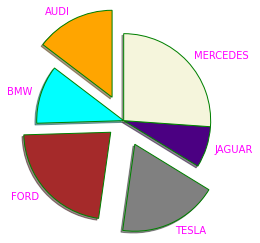

In [ ]:
plt.pie(data, labels=cars, #quantitative e qualitative variables
        explode = explode, #array-like: specifies the fraction of the radius with which to offset each wedge (Default None)
        shadow = True,     #bool: draw a shadow beneath the pie (Default False)
        colors = colors,   #array-like: sequence of colors through which the pie chart will cycle (Default None)
        startangle = 90,   #int: angle by which the start of the pie is rotated, counterclockwise from the x-axis (Default 0)
        wedgeprops = wp,   #dict: dict of arguments passed to the wedge objects making the pie (Default None)
        textprops = txtpro #dict: dict of arguments to pass to the text objects (Default None)
 )

#### Plotly

In [ ]:
fig = px.pie(df, values='pop', #str :: magnitude of each group, info in col name - quantitative var
             names='country',  #str :: group rows by col names with same value - qualitative var
             color_discrete_sequence=px.colors.sequential.RdBu, #set color, or use: `color=nameCol and color_discrete_map={NamesValue: color name}`
             labels={'country':'life expectancy'},              #optional - dict :: {ColNameInHoverData: NewNameToDisplay}
             hover_data=['lifeExp'], title='Pie title')

fig.show()

## Waterfall Chart

X-Axes: *1+ qualitative variables* <---> Y-Axes: *1 quantitative variable*

--------------------------------------------------------------------###--------------------------------------------------------------------

Are made of bars showing the cumulative effect of a series of positive and negative values impacting a starting and an ending value.

Good to see the difference between two periods and how one variable was influenced by a series of factors to obtain a specific output.

Bad for data that does not involve intermediary steps or segments.

In [ ]:
df = pd.DataFrame({'price':[63.8, 55.7, 32.5, 18.4, 29.4, 40.3, 43.2, 44.7, 40.9, 40.2, 42.7, 50]},
                      index=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
df['delta'] = [df['price'][i] if i==0 else df['price'][i]-df['price'][i-1] for i in range(len(df))]

In [ ]:
!pip install waterfallcharts

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

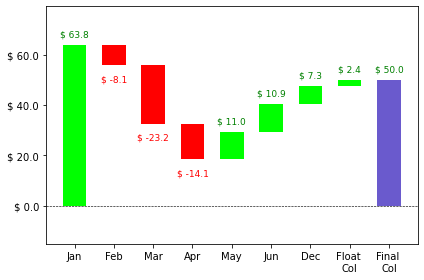

In [ ]:
import waterfall_chart
waterfall_chart.plot(df.index, df['delta'],     #array-like: data in ax x and y
                     rotation_value=0,          #int: rotation angle for x-tick labels (Default 30)
                     #sorted_value=True,        #bool: sort the positive and negative changes in descending order by magnitude
                     threshold=0.1,  #10%       #int: if assigned, the deltas w/ a magnitude below that value will be grouped into a single entity
                     formatting="$ {:,.1f}",    #str: the format of displaying magnitudes of changes (Default "{:,.1f}")
                     net_label='Final \nCol',   #str: the name of the final column (Default "net")
                     other_label='Float \nCol', #str: name of the floating column - use with threshold - sum col w/ values < threshold*max_delta
                     blue_color='slateblue', green_color='lime', red_color='red')

## Bullet Graph

X-Axes: *1+ qualitative variables* - feature measure <---> Y-Axes: *1 quantitative variable*

Color: *1 qualitative variable* <---> Mark: *1 qualitative variable*

--------------------------------------------------------------------###--------------------------------------------------------------------

Is a bar marked with extra encondings to show progess towards a goal *(color)* or performance against a reference line *(mark)*.

Each bar focuses the user on one measure, bringin in more visual elements to provide additional detail.

Adding *lines* and *shading* in and around the featured measure add context/information.

In [ ]:
data = [
  {"label": "revenue",
   "sublabel": "us$, in thousands",
   "range": [150, 225, 300],
   "performance": [220,270],
   "point": [250]},

  {"label": "Profit",
   "sublabel": "%",
   "range": [20, 25, 30],
   "performance": [21, 23],
   "point": [26]},

  {"label": "Order Size",
   "sublabel":"US$, average",
   "range": [350, 500, 600],
   "performance": [100,320],
   "point": [550]},

  {"label": "New Customers",
   "sublabel": "count",
   "range": [1400, 2000, 2500],
   "performance": [1000, 1650],
   "point": [2100]},

  {"label": "Satisfaction",
   "sublabel": "out of 5",
   "range": [3.5, 4.25, 5],
   "performance": [3.2, 4.7],
   "point": [4.4]}
]

In [ ]:
import plotly.figure_factory as ff
                                                      #each dict is a bullet in the plot
fig = ff.create_bullet(data,                   #list of dict: data to plot, all dict has the same layout
                       titles='label',         #key name - str: bullet name
                       subtitles='sublabel',   #key name - str: bullet sub name
                       markers='point',        #key name - list of int: mark one point on the bullet
                       measures='performance', #key name - list of int: stacked limits for the intern bar
                       ranges='range',         #key name - list of int: stacked limits for the outside bar, the last value is the range max
                       orientation='h',        #h or v: bullets orientation
                       title='Title'           #str: chart title
)

fig.show()

## Funnel Chart

Steps: *1+ qualitatives variables* <---> Value: *1 qualitatives variables*

--------------------------------------------------------------------###--------------------------------------------------------------------

Shows a series of steps and the completion rate for each step, can be in percentage.

Starts from a broad head and ends in a narrow neck.

Good to track sales processes or rates across a series of steps.


In [ ]:
# Matplotlib
labels = ['Hot Leads', 'Samples Sent', 'Quotes', 'Negotiations', 'Sales']
y, x = [5,4,3,2,1], [80,73,58,42,23]
x_max, x_min = 100, 0
x_range = x_max - x_min

# Plotly
stages = ["Website visit", "Downloads", "Potential customers", "Requested price", "invoice sent"]
df_mtl = pd.DataFrame(dict(number=[41, 19, 21, 9, 10], stage=stages))
df_mtl['office'] = 'Montreal'
df_toronto = pd.DataFrame(dict(number=[40, 20, 20, 10, 10], stage=stages))
df_toronto['office'] = 'Toronto'
df_vancouver = pd.DataFrame(dict(number=[35, 25, 23, 7, 10], stage=stages))
df_vancouver['office'] = 'Vancouver'
df = pd.concat([df_mtl, df_toronto, df_vancouver], axis=0)

#### Matplotlib

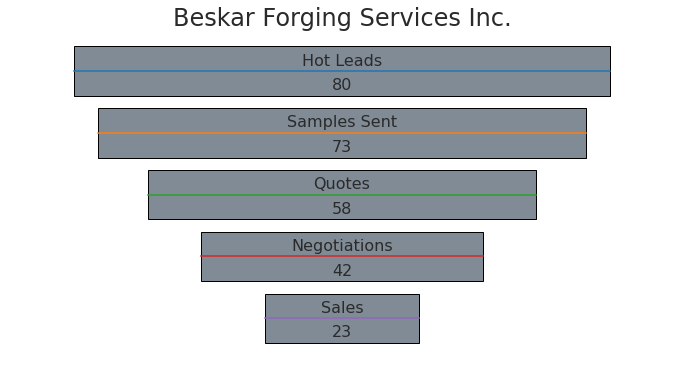

In [ ]:
fig, ax = plt.subplots(1, figsize=(12,6))

for idx, x_val in enumerate(x):
    left_shift = (x_range - x_val)/2            #left shift on the bar/stacked
    plt.barh(y[idx], x[idx], left=left_shift, color='#808B96', height=.8, edgecolor='black') #the bar/stacked
    plt.text(50, y[idx]+0.1, labels[idx], ha='center', fontsize=16, color='#2A2A2A')     #label
    plt.text(50, y[idx]-0.3, x[idx], ha='center', fontsize=16, color='#2A2A2A')          #value
    plt.plot([left_shift, 100-left_shift], [y[idx], y[idx]])                        #plot the bat/stacked

plt.xlim(x_min, x_max)
plt.axis('off')
plt.title('Beskar Forging Services Inc.', loc='center', fontsize=24, color='#2A2A2A')
plt.show()

#### Plotly

In [ ]:
fig = px.funnel(df, x='number', y='stage', color='office')
fig.show()

In [ ]:
# by how much, in percentage, that row represent
fig = px.funnel_area(df, values='number', names='stage')
fig.show()

## Heat Map

Axes: *2 variables* <---> Colors: *1 quantitative*

--------------------------------------------------------------------###--------------------------------------------------------------------

Produce multi-color interpretations of some value (based on a variable) over two variables.

Good to see complex problems related to hyperparameter tuning or analysis of machine learning algorithms like decision trees, random forests, KNN or parts of a website that is been clicked.

In [ ]:
# Matplotlib & Seaborn - also work in Plotly
data = np.random.random((12,12))

# Plotly
data=[[1, 25, 30, 50, 1], [20, 1, 60, 80, 30], [30, 60, 1, 5, 20]]

#### Matplotlib

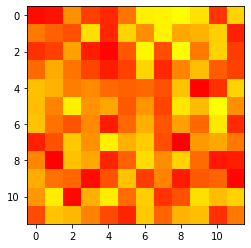

In [ ]:
plt.imshow(data, cmap='autumn', interpolation='nearest' ) # or `plt.pcolormesh()`
plt.show()

#### Seaborn

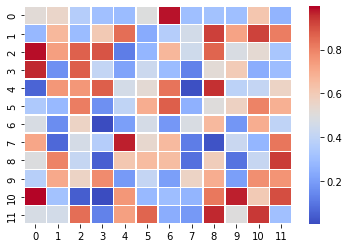

In [ ]:
sns.heatmap(data, linewidth=0.5, cmap='coolwarm' )
plt.show()

#### Plotly

In [ ]:
fig = px.imshow(data,
                labels=dict(x="Day of Week", y="Time of Day", color="Productivity"), #Axis x/y and color titles/info related
                x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],          #name of each value in axis x
                y=['Morning', 'Afternoon', 'Evening'],                               #name of each value in axis y
                text_auto=True
               )
fig.update_xaxes(side="top")
fig.show()

## Treemap/Mekko Chart

Blocks: *1+ qualitative variables* <---> Size of the blocks: *1 quantitative variable*

--------------------------------------------------------------------###--------------------------------------------------------------------

It allows us to split the sum of the whole into hierarchies and then show an internal breakdown of each of these hierarchies.

Good when the data is divided in categories and sub-categories.

Impossible track development over time.

#### Pygal

In [ ]:
!pip install pygal

In [ ]:
!pip install cairosvg

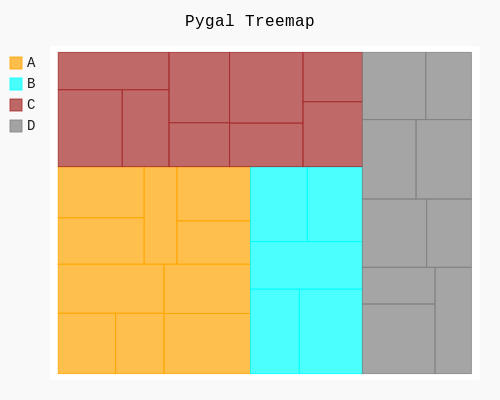

In [ ]:
import pygal
from pygal.style import Style
custom_style = Style(colors=colors) #define colors

# initialize the treemap from Pygal library with custom figure size
treemap = pygal.Treemap(width=500, height=400, explicit_size=True, style=custom_style)
treemap.title = 'Pygal Treemap'

# add sample dataframe
treemap.add('A', [26, 22, 39, 39, 32, 30, 33, 24, 24, 30])
treemap.add('B', [31, 40, None, None, None, None, 40, 32, 31])
treemap.add('C', [37, 27, 31, 20, None, 32, 24, 39, 29, 22])
treemap.add('D', [38, None, 20, 29, 33, 23, 32, 33, 32, 23])

#render the treemap
treemap

#### Plotly

In [ ]:
df = px.data.gapminder().query("year == 2007")


In [ ]:
fig = px.treemap(df, # data
                 path=[px.Constant("world"), 'continent', 'country'], # list of str :: each one is a level; if is a Col Name, each Value is a shell
                 values='pop', #ColName w/ the shell magnitude               #a hierarchical is created   ; if is a Constant, the cst is a unique shell
                 color='lifeExp', hover_data=['iso_alpha'], labels={'lifeExp':'life expectancy'},
                 color_continuous_scale='RdBu', color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']) # color funcs
                 )


#define top, left, right, bottom fig margin values
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

fig.show()